In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [52]:
data = pd.read_csv("convertcsv.csv")
data.head()

,timestamp,value,created_at
0,1665174190000,19.41,1665174197699
1,1665174070000,19.41,1665174078511
2,1665173950000,19.39,1665173958662
3,1665173830000,19.39,1665173838126
4,1665173710000,19.36,1665173717681


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   800 non-null    int64  
 1   value       800 non-null    float64
 2   created_at  800 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 18.9 KB


In [56]:
data["date_timestamp"] = pd.to_datetime(data.timestamp, unit="ms")
data["date_created_at"] = pd.to_datetime(data.created_at, unit="ms")

In [58]:
data_new=data[:100]

In [7]:
#data['timestamp'] = data['timestamp'].astype(str)

In [59]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        100 non-null    int64         
 1   value            100 non-null    float64       
 2   created_at       100 non-null    int64         
 3   date_timestamp   100 non-null    datetime64[ns]
 4   date_created_at  100 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 4.0 KB


In [61]:
data_new.describe()

,timestamp,value,created_at
count,1.000000e+02,100.00000,1.000000e+02
mean,1.665168e+12,19.20400,1.665168e+12
std,3.642785e+06,0.09303,3.642667e+06
min,1.665162e+12,19.08000,1.665162e+12
25%,1.665165e+12,19.12500,1.665165e+12
50%,1.665168e+12,19.20000,1.665168e+12
75%,1.665171e+12,19.28000,1.665171e+12
max,1.665174e+12,19.41000,1.665174e+12


StopIteration: 

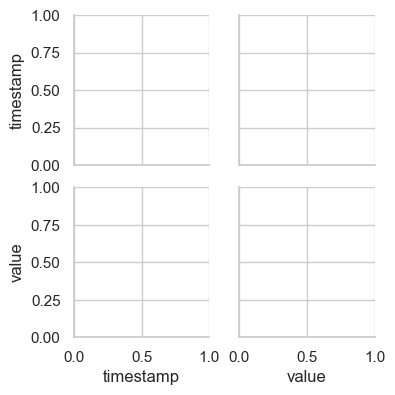

In [66]:
sns.set(style="whitegrid", context="notebook")
cols=['timestamp','value']
sns.pairplot(data_new[cols], height=2)
plt.show()

<AxesSubplot: xlabel='value'>

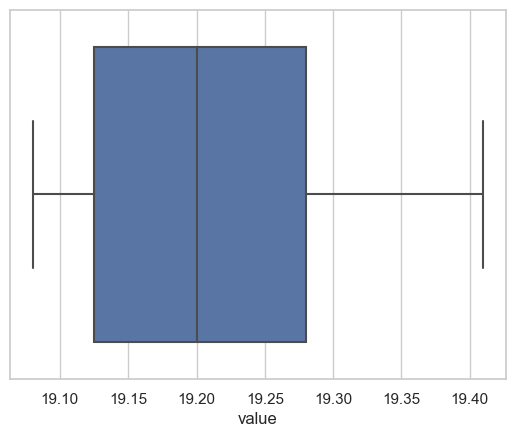

In [63]:
#df = sns.load_dataset(data)
sns.boxplot(x=data_new["value"])

<AxesSubplot: >

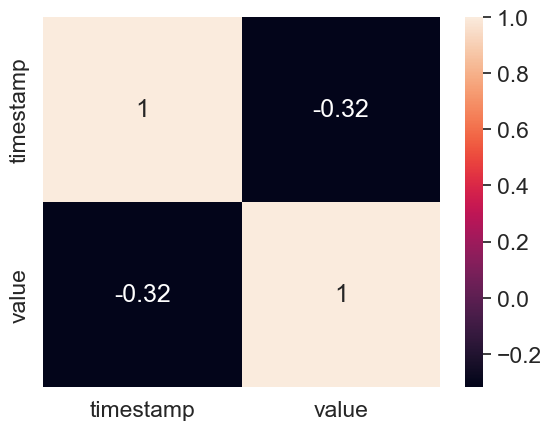

In [67]:
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [19]:
X= data["value"].values
y= data["timestamp"].values

In [27]:
X=X.reshape(-1, 1)
y=y.reshape(-1, 1)

In [34]:
sc_x=StandardScaler()
sc_y=StandardScaler()


X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [35]:
slr=LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

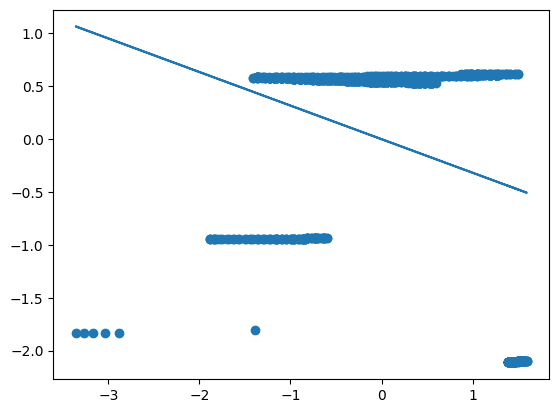

In [37]:
plt.scatter(X_std, y_std)
plt.plot(X_std, slr.predict(X_std))